<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Predicting Shots Made Per Game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties — ridge, lasso, and elastic net — to try and predict how many shots Kobe Bryant made per game during his career.

The Kobe Shots data set contains hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model, considering the limited number of observations (games) we have available. Plus, many of the predictors have significant multicollinearity. 


**Warning:** Some of these calculations are computationally expensive and may take a while to execute. It may be worthwhile to only use a portion of the data to perform these calculations, especially if you've experienced kernel issues in the past.

---

### 1) Load packages and data.

In [18]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [19]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2) Examine the data.

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why might regularization be particularly useful for modeling this data?

In [20]:
len(kobe)

1558

In [21]:
kobe.shape

(1558, 645)

In [22]:
kobe.columns[0:20]

Index(['SHOTS_MADE', 'AWAY_GAME', 'SEASON_OPPONENT:atl:1996-97',
       'SEASON_OPPONENT:atl:1997-98', 'SEASON_OPPONENT:atl:1999-00',
       'SEASON_OPPONENT:atl:2000-01', 'SEASON_OPPONENT:atl:2001-02',
       'SEASON_OPPONENT:atl:2002-03', 'SEASON_OPPONENT:atl:2003-04',
       'SEASON_OPPONENT:atl:2004-05', 'SEASON_OPPONENT:atl:2005-06',
       'SEASON_OPPONENT:atl:2006-07', 'SEASON_OPPONENT:atl:2007-08',
       'SEASON_OPPONENT:atl:2008-09', 'SEASON_OPPONENT:atl:2009-10',
       'SEASON_OPPONENT:atl:2010-11', 'SEASON_OPPONENT:atl:2011-12',
       'SEASON_OPPONENT:atl:2012-13', 'SEASON_OPPONENT:atl:2013-14',
       'SEASON_OPPONENT:atl:2014-15'],
      dtype='object')

In [23]:
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


---

### 3) Create predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
y = kobe['SHOTS_MADE']
X = kobe.iloc[:,1:]

In [26]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [27]:
lr = LinearRegression()

lr_scores = cross_val_score(lr, X_ss, y, cv=10)
display(lr_scores)

array([-3.99334736e+28, -8.10566280e+27, -4.47516205e+27, -1.01407232e+27,
       -7.61645046e+26, -2.01766073e+27, -3.75694414e+27, -6.67782814e+26,
       -6.41089122e+27, -1.00519390e+28])

In [28]:
np.mean(lr_scores)

-7.719523369007428e+27

In [29]:
np.mean(y)

7.358793324775353

In [30]:
lr_pred = cross_val_predict(lr, X, y, cv=10)

In [31]:
lr_pred

array([ 5.26965330e+07,  5.26961370e+07,  1.81370959e+07, ...,
       -1.58425058e+08, -1.31140525e+08, -1.31140513e+08])

In [32]:
np.mean(lr_pred)

-76280451.95662782

---

### 5) Find an optimal value for the ridge regression alpha using `RidgeCV`.

Go to the documentation and [read how RidgeCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

> *Hint: Once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that ridge performs best when searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit.


In [33]:
ridge_alphas = np.logspace(0,5,200)

In [34]:
optimal_ridge = RidgeCV(alphas = ridge_alphas, cv=10)

In [35]:
optimal_ridge.fit(X_ss, y)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10)

In [36]:
optimal_ridge.alpha_

775.2597488629465

In [38]:
ridge_pred = optimal_ridge.predict(X_ss)
display(ridge_pred)

array([-0.03796849, -0.09139434,  0.99791667, ...,  8.6095218 ,
        4.01508467, 16.16762657])

In [39]:
ridge_pred.mean()

7.358793324775353

In [43]:
optimal_ridge.score(X_ss, y)

0.7798565133622948

---

### 6) Cross-validate the ridge regression $R^2$ with the optimal alpha.

Is it better than the linear regression? If so, why might this be?

In [44]:
ridge_lr = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge_lr, X_ss, y, cv=10)

In [45]:
np.mean(ridge_scores)

0.5030628996817686

In [46]:
ridge_scores

array([0.5822626 , 0.52880462, 0.4869004 , 0.59583817, 0.52396335,
       0.52942952, 0.52842192, 0.41153448, 0.39857643, 0.44489752])

---

### 7) Find an optimal value for lasso regression alpha using `LassoCV`.

Go to the documentation and [read how LassoCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). It is very similar to `RidgeCV`.

> *Hint: Again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that lasso, unlike ridge, performs best when searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide what alphas to use itself by setting the keyword argument `n_alphas=` to however many alphas you want it to search over. We recommend letting scikit-learn choose the range of alphas.

_**Tip:** If you find your CV taking a long time and you're not sure if it's working, set `verbose =1`._

In [47]:
optimal_lasso = LassoCV(n_alphas=500, cv=10)

In [48]:
optimal_lasso.fit(X_ss, y)

LassoCV(cv=10, n_alphas=500)

In [49]:
optimal_lasso.alpha_

0.06790539979326354

In [50]:
lasso_preds = optimal_lasso.predict(X_ss)

In [51]:
np.mean(lasso_preds)

7.358793324775353

In [52]:
np.mean(y)

7.358793324775353

In [53]:
optimal_lasso.score(X_ss, y)

0.7108538015695378

In [55]:
coef = list(optimal_lasso.coef_)
[]

---

### 8) Cross-validate the lasso $R^2$ with the optimal alpha.

Is it better than the linear regression? Is it better than ridge? What do the differences in results imply about the issues with the data set?

In [59]:
lasso_lr = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso_lr, X_ss, y, cv=10)

In [60]:
np.mean(lasso_scores)

0.5354922262084527

In [61]:
lasso_scores

array([0.61603625, 0.52641159, 0.53888743, 0.61322432, 0.54627539,
       0.5554072 , 0.52716822, 0.44849563, 0.4646267 , 0.51838952])

---

### 9) Look at the coefficients for variables in the lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original data set are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** If you only fit the lasso within `cross_val_score`, you'll have to refit it outside of that function to pull out the coefficients.

In [64]:
lasso_coeffs = pd.DataFrame({
                "variables":X.columns,
                "coef":optimal_lasso.coef_,
                "abs_coeff":np.abs(optimal_lasso.coef_)
                })

In [67]:
lasso_coeffs.sort_values('abs_coeff', inplace=True, ascending=False)

In [68]:
lasso_coeffs.head(20)

,variables,coef,abs_coeff
579,COMBINED_SHOT_TYPE:jump_shot,1.233880,1.233880
574,SHOT_TYPE:2pt_field_goal,0.866201,0.866201
566,SHOT_ZONE_BASIC:restricted_area,0.453050,0.453050
577,COMBINED_SHOT_TYPE:dunk,0.274926,0.274926
611,ACTION_TYPE:jump_shot,-0.272130,0.272130
575,SHOT_TYPE:3pt_field_goal,0.140492,0.140492
582,SECONDS_REMAINING,0.132360,0.132360
612,ACTION_TYPE:layup_shot,-0.129658,0.129658
423,SEASON_OPPONENT:sac:1999-00,0.127065,0.127065
561,SHOT_ZONE_BASIC:above_the_break_3,0.118469,0.118469


In [69]:
1 - np.sum((optimal_lasso.coef_ == 0)/len(optimal_lasso.coef_))

0.21118012422360266

---

### 10) Find an optimal value for elastic net regression alpha using `ElasticNetCV`.

Go to the documentation and [read how ElasticNetCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note that here you'll be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: Strength of regularization.
- `l1_ratio`: Amount of ridge vs. lasso (0 = all ridge, 1 = all lasso).
    
Do not include 0 in the search for `l1_ratio` — it won't allow it and will break.

You can use `n_alphas` for the alpha parameters instead of setting your own values, which we highly recommend.

Also, be careful setting too many l1_ratios over cross-validation folds in your search. It can take a long time if you choose too many combinations and, for the most part, there are diminishing returns in this data.

In [70]:
l1_rations = np.linspace(0.01, 1.0, 25)

In [71]:
optimal_elnet = ElasticNetCV(l1_ratio=l1_rations, n_alphas=100, cv=10)

In [72]:
optimal_elnet.fit(X_ss, y)

ElasticNetCV(cv=10,
             l1_ratio=array([0.01   , 0.05125, 0.0925 , 0.13375, 0.175  , 0.21625, 0.2575 ,
       0.29875, 0.34   , 0.38125, 0.4225 , 0.46375, 0.505  , 0.54625,
       0.5875 , 0.62875, 0.67   , 0.71125, 0.7525 , 0.79375, 0.835  ,
       0.87625, 0.9175 , 0.95875, 1.     ]))

In [73]:
optimal_elnet.alpha_

0.07271360998818006

In [74]:
optimal_elnet.l1_ratio_

0.9587500000000001

---

### 11) Cross-validate the elastic net $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the ridge and lasso regularized regressions?

In [76]:
elnet_lr = ElasticNet(alpha = optimal_elnet.alpha_, l1_ratio = optimal_elnet.l1_ratio_)
elnet_scores = cross_val_score(elnet_lr, X_ss, y, cv=10)

In [77]:
print(elnet_scores)

[0.61742795 0.52697978 0.53864379 0.61332045 0.54728018 0.55547707
 0.52548033 0.4485161  0.46407359 0.52059974]


In [78]:
np.mean(elnet_scores)

0.5357798983416926

In [79]:
display(np.mean(ridge_scores))
display(np.mean(lasso_scores))
display(np.mean(elnet_scores))

0.5030628996817686

0.5354922262084527

0.5357798983416926

---

### 12. [Bonus] Compare the residuals for ridge and lasso visually.


In [ ]:
# A: Maybe a jointplot?

In [83]:
lasso_lr.fit(X_ss,y)
ridge_lr.fit(X_ss,y)

lasso_pred = lasso_lr.predict(X_ss)
ridge_pred = ridge_lr.predict(X_ss)

lasso_residuals = y-lasso_pred
ridge_residuals = y-ridge_pred

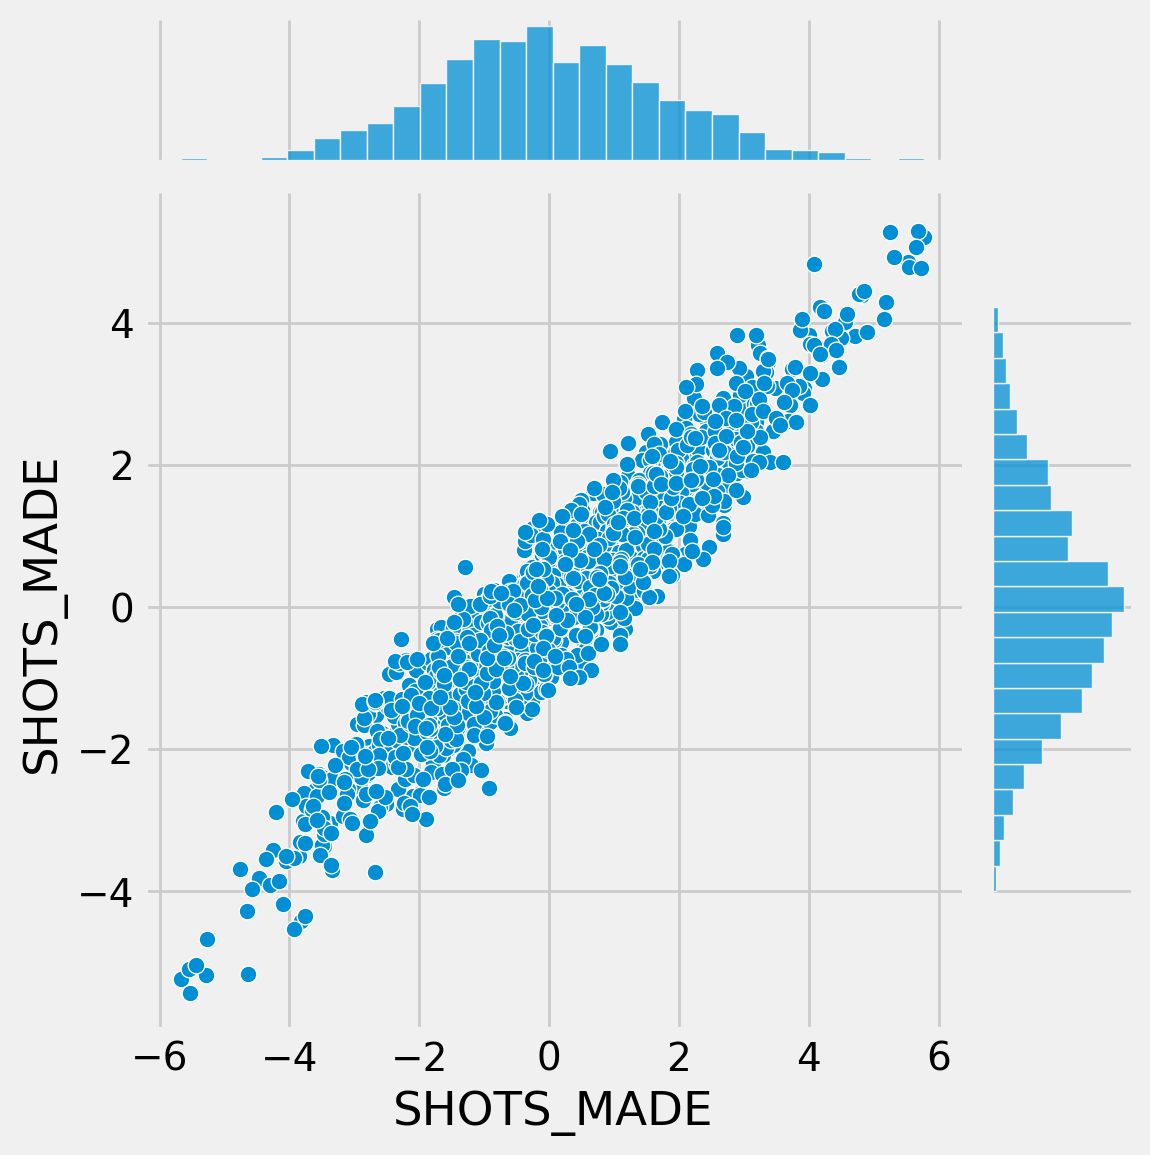

In [85]:
sns.jointplot(x=lasso_residuals, y=ridge_residuals)